#Predict AQI level based on pollutant readings.

Overview of import in updated project


*   **`import pandas as pd`** for data manipulation and analysis
*   **`import numpy as np`** for numerical operation
*   **`import matplotlib.pyplot as plt`** for creating statistical plot and visulization
*   **`import seaborn as sns`** for Enhanced statistical plots built on top of matplotlib
*   **`import warnings`** Manage and suppress warning messages
*   **`warnings.filterwarnings("ignore")`** Silences warnings to keep output clean during execution

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#**Fetch Data**

**Download data from "kaggle" i.e., AQI datasets and store into a drive**

```
kaggle link - https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india
```



**1. Loading of data**

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/python/ML Project/AQI/city_day.csv")       #day
df2 = pd.read_csv("/content/drive/MyDrive/python/ML Project/AQI/city_hour.csv")      #hour
df3 = pd.read_csv("/content/drive/MyDrive/python/ML Project/AQI/station_day.csv")    #day
df4 = pd.read_csv("/content/drive/MyDrive/python/ML Project/AQI/station_hour.csv")   #hour
df5 = pd.read_csv("/content/drive/MyDrive/python/ML Project/AQI/stations.csv")       #source

**Inspecting the Data**

After loading the dataset, check the given parameter

In [ ]:
df1.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN


In [ ]:
df2.head(2)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
df3.head(2)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate


In [ ]:
df4.head(2)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.5,98.00,2.35,30.8,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.5,111.25,2.70,24.2,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN


**2. Clean Data**

In [ ]:
# check 'Datetime' is in datetime format
df2["Datetime"] = pd.to_datetime(df2["Datetime"])

# Create a new 'Date' and 'Time' column
df2["Date"] = df2["Datetime"].dt.date
df2["Time"] = df2["Datetime"].dt.time

# Drop 'Datetime' and 'Time'
df2.drop(columns=["Datetime", "Time"], inplace=True)

In [ ]:
# check 'Datetime' is in datetime format
df4["Datetime"] = pd.to_datetime(df4["Datetime"])

# Create a new 'Date' and 'Time' column
df4["Date"] = df4["Datetime"].dt.date
df4["Time"] = df4["Datetime"].dt.time

# Drop 'Datetime' and 'Time'
df4.drop(columns=["Datetime", "Time"], inplace=True)

In [ ]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df2.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Date
0,Ahmedabad,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN,2015-01-01
1,Ahmedabad,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN,2015-01-01
2,Ahmedabad,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN,2015-01-01
3,Ahmedabad,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN,2015-01-01
4,Ahmedabad,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN,2015-01-01


In [ ]:
City=pd.concat([df1, df2], ignore_index=True)

In [ ]:
df5.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [ ]:
df3.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [ ]:
df4.head()

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Date
0,AP001,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN,2017-11-24
1,AP001,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN,2017-11-24
2,AP001,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN,2017-11-24
3,AP001,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN,2017-11-24
4,AP001,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN,2017-11-24


In [ ]:
Station=pd.concat([df3, df4], ignore_index=True)
Station.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [ ]:
StationMerge = pd.merge(Station, df5, on='StationId', how='left')
StationMerge.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [ ]:
CityMerge = pd.merge(City, df5, on='City', how='left')
CityMerge.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationId,StationName,State,Status
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active


In [ ]:
df = pd.concat([CityMerge, StationMerge], ignore_index=True)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationId,StationName,State,Status
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active


In [ ]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_percent[missing_percent > 0])

Xylene        64.200048
PM10          35.733151
NH3           34.821353
Toluene       24.457727
SO2           19.197715
O3            19.032093
Benzene       18.917878
PM2.5         17.539414
AQI_Bucket    16.166478
AQI           16.166478
NO            14.729405
NO2           14.398093
NOx           12.361554
CO            10.475490
Status         0.218185
dtype: float64


**Information about data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360725 entries, 0 to 7360724
Data columns (total 20 columns):
 #   Column       Dtype  
---  ------       -----  
 0   City         object 
 1   Date         object 
 2   PM2.5        float64
 3   PM10         float64
 4   NO           float64
 5   NO2          float64
 6   NOx          float64
 7   NH3          float64
 8   CO           float64
 9   SO2          float64
 10  O3           float64
 11  Benzene      float64
 12  Toluene      float64
 13  Xylene       float64
 14  AQI          float64
 15  AQI_Bucket   object 
 16  StationId    object 
 17  StationName  object 
 18  State        object 
 19  Status       object 
dtypes: float64(13), object(7)
memory usage: 1.1+ GB


**Understand distributions:**

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,6.069697e+06,4.730506e+06,6.276534e+06,6.300921e+06,6.450825e+06,4.797621e+06,6.589653e+06,5.947634e+06,5.959825e+06,5.968232e+06,5.560459e+06,2.635136e+06,6.170755e+06
mean,8.632343e+01,1.700344e+02,2.524522e+01,3.748860e+01,4.280135e+01,3.229840e+01,1.581000e+00,1.287080e+01,4.067447e+01,3.077682e+00,1.254262e+01,2.069093e+00,1.924205e+02
std,8.903990e+01,1.364677e+02,4.388716e+01,3.106903e+01,4.956152e+01,2.659739e+01,5.333143e+00,1.360911e+01,3.751305e+01,9.477549e+00,2.331151e+01,6.461928e+00,1.356323e+02
min,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
25%,3.150000e+01,7.200000e+01,4.770000e+00,1.642000e+01,1.414000e+01,1.513000e+01,4.800000e-01,5.260000e+00,1.686000e+01,2.700000e-01,9.500000e-01,0.000000e+00,9.000000e+01
50%,5.756000e+01,1.288600e+02,1.017000e+01,2.917000e+01,2.712000e+01,2.805000e+01,8.800000e-01,9.400000e+00,3.081000e+01,1.440000e+00,4.830000e+00,3.600000e-01,1.480000e+02
75%,1.079700e+02,2.292900e+02,2.405000e+01,4.951000e+01,5.128000e+01,4.136000e+01,1.420000e+00,1.575000e+01,5.455000e+01,3.410000e+00,1.517000e+01,1.880000e+00,2.850000e+02
max,1.000000e+03,1.000000e+03,5.000000e+02,4.999900e+02,5.000000e+02,4.999700e+02,4.985700e+02,1.999600e+02,9.970000e+02,4.980700e+02,4.999900e+02,4.999900e+02,3.133000e+03


In [ ]:
# pd.options.display.float_format = '{:.2f}'.format      # less robust
pd.set_option('display.float_format', '{:.2f}'.format)   # more robust
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,6069697.00,4730506.00,6276534.00,6300921.00,6450825.00,4797621.00,6589653.00,5947634.00,5959825.00,5968232.00,5560459.00,2635136.00,6170755.00
mean,86.32,170.03,25.25,37.49,42.80,32.30,1.58,12.87,40.67,3.08,12.54,2.07,192.42
std,89.04,136.47,43.89,31.07,49.56,26.60,5.33,13.61,37.51,9.48,23.31,6.46,135.63
min,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,5.00
25%,31.50,72.00,4.77,16.42,14.14,15.13,0.48,5.26,16.86,0.27,0.95,0.00,90.00
50%,57.56,128.86,10.17,29.17,27.12,28.05,0.88,9.40,30.81,1.44,4.83,0.36,148.00
75%,107.97,229.29,24.05,49.51,51.28,41.36,1.42,15.75,54.55,3.41,15.17,1.88,285.00
max,1000.00,1000.00,500.00,499.99,500.00,499.97,498.57,199.96,997.00,498.07,499.99,499.99,3133.00


**Check for missing values**

In [ ]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,1291028
PM10,2630219
NO,1084191
NO2,1059804
NOx,909900
NH3,2563104
CO,771072
SO2,1413091


In [ ]:
#missing Percentage
null_percent = ((df.isna().sum() / len(df)) * 100).round(2)
print(null_percent)

City           0.00
Date           0.00
PM2.5         17.54
PM10          35.73
NO            14.73
NO2           14.40
NOx           12.36
NH3           34.82
CO            10.48
SO2           19.20
O3            19.03
Benzene       18.92
Toluene       24.46
Xylene        64.20
AQI           16.17
AQI_Bucket    16.17
StationId      0.00
StationName    0.00
State          0.00
Status         0.22
dtype: float64


In [ ]:
# drop the column with has more number of missing value i.e., Xylene has 64.20% null value
df.drop("Xylene",axis=1,inplace=True)

**drop missing value**

In [ ]:
AQI = df.dropna()

In [ ]:
#To cross-check all null are remove
AQI.isna().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
AQI.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00
mean,93.14,184.42,29.58,43.80,50.87,33.56,1.52,13.30,45.69,3.72,16.08,209.87
std,87.78,138.91,46.93,29.15,50.89,21.44,2.19,10.49,38.85,9.74,24.11,127.70
min,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,8.00
25%,35.86,81.65,5.70,23.63,20.02,18.95,0.63,6.72,21.04,0.96,3.22,103.00
50%,63.88,144.25,12.22,36.90,34.40,30.63,0.95,10.76,35.61,2.14,8.71,177.00
75%,120.25,252.12,29.98,57.37,62.53,42.83,1.46,16.83,61.10,4.26,20.07,307.00
max,1000.00,1000.00,499.80,498.30,500.00,491.34,50.00,199.93,996.00,498.07,499.50,1057.00


**check for skewness**

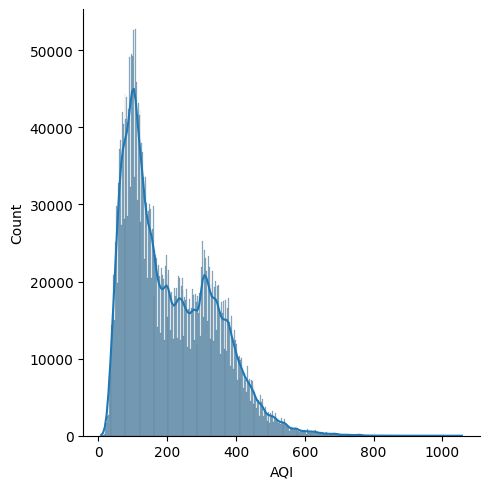

In [ ]:
sns.displot(AQI['AQI'],kde=True)

In [ ]:
print(AQI['PM2.5'].skew(),AQI['PM10'].skew())
AQI['NO'].skew(),AQI['NO2'].skew(),AQI['NOx'].skew(),AQI['NH3'].skew()

2.340580315448888 1.4196342795556058


(np.float64(3.4737904727892976),
 np.float64(1.7869509018751302),
 np.float64(2.618174400141252),
 np.float64(2.215045360283963))

In [ ]:
AQI['CO'].skew(),AQI['SO2'].skew(),AQI['O3'].skew()

(np.float64(5.445278214475694),
 np.float64(3.162511134519528),
 np.float64(3.862369625128804))

In [ ]:
AQI['Benzene'].skew(),AQI['Toluene'].skew(),AQI['AQI'].skew()

(np.float64(30.427833829113034),
 np.float64(6.194491026239186),
 np.float64(0.7554349241373929))

In [ ]:
AQI = AQI.reset_index(drop=True)
AQI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364112 entries, 0 to 3364111
Data columns (total 19 columns):
 #   Column       Dtype  
---  ------       -----  
 0   City         object 
 1   Date         object 
 2   PM2.5        float64
 3   PM10         float64
 4   NO           float64
 5   NO2          float64
 6   NOx          float64
 7   NH3          float64
 8   CO           float64
 9   SO2          float64
 10  O3           float64
 11  Benzene      float64
 12  Toluene      float64
 13  AQI          float64
 14  AQI_Bucket   object 
 15  StationId    object 
 16  StationName  object 
 17  State        object 
 18  Status       object 
dtypes: float64(12), object(7)
memory usage: 487.7+ MB


In [ ]:
AQI.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,StationId,StationName,State,Status
0,Aizawl,2020-03-12,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,52.00,Satisfactory,MZ001,"Sikulpuikawn, Aizawl - Mizoram PCB",Mizoram,Active
1,Aizawl,2020-03-13,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,60.00,Satisfactory,MZ001,"Sikulpuikawn, Aizawl - Mizoram PCB",Mizoram,Active
2,Aizawl,2020-03-14,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,62.00,Satisfactory,MZ001,"Sikulpuikawn, Aizawl - Mizoram PCB",Mizoram,Active
3,Aizawl,2020-03-15,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,70.00,Satisfactory,MZ001,"Sikulpuikawn, Aizawl - Mizoram PCB",Mizoram,Active
4,Aizawl,2020-03-16,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,0.13,0.68,54.00,Satisfactory,MZ001,"Sikulpuikawn, Aizawl - Mizoram PCB",Mizoram,Active


In [ ]:
AQI.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00,3364112.00
mean,93.14,184.42,29.58,43.80,50.87,33.56,1.52,13.30,45.69,3.72,16.08,209.87
std,87.78,138.91,46.93,29.15,50.89,21.44,2.19,10.49,38.85,9.74,24.11,127.70
min,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,8.00
25%,35.86,81.65,5.70,23.63,20.02,18.95,0.63,6.72,21.04,0.96,3.22,103.00
50%,63.88,144.25,12.22,36.90,34.40,30.63,0.95,10.76,35.61,2.14,8.71,177.00
75%,120.25,252.12,29.98,57.37,62.53,42.83,1.46,16.83,61.10,4.26,20.07,307.00
max,1000.00,1000.00,499.80,498.30,500.00,491.34,50.00,199.93,996.00,498.07,499.50,1057.00


In [ ]:
print(AQI["State"].unique())
AQI["State"].nunique()

['Mizoram' 'Andhra Pradesh' 'Punjab' 'Karnataka' 'Chandigarh' 'Tamil Nadu'
 'Delhi' 'Haryana' 'Telangana' 'Rajasthan' 'West Bengal' 'Bihar'
 'Meghalaya' 'Odisha']


14

In [ ]:
print(AQI["City"].unique())
AQI["City"].nunique()

['Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Chandigarh' 'Chennai'
 'Coimbatore' 'Delhi' 'Gurugram' 'Hyderabad' 'Jaipur' 'Kolkata' 'Patna'
 'Shillong' 'Talcher' 'Visakhapatnam']


16

In [ ]:
AQI["AQI_Bucket"].unique()

array(['Satisfactory', 'Good', 'Moderate', 'Poor', 'Very Poor', 'Severe'],
      dtype=object)

In [ ]:
AQI["AQI_Bucket"].nunique()

6

In [ ]:
AQI["AQI_Bucket"].min()

'Good'

In [ ]:
AQI["AQI_Bucket"].max()

'Very Poor'

In [ ]:
AQI.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,StationId,StationName,State,Status
0,Aizawl,2020-03-12,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,52.00,Satisfactory,MZ001,"Sikulpuikawn, Aizawl - Mizoram PCB",Mizoram,Active
1,Aizawl,2020-03-13,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,60.00,Satisfactory,MZ001,"Sikulpuikawn, Aizawl - Mizoram PCB",Mizoram,Active
2,Aizawl,2020-03-14,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,62.00,Satisfactory,MZ001,"Sikulpuikawn, Aizawl - Mizoram PCB",Mizoram,Active
3,Aizawl,2020-03-15,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,70.00,Satisfactory,MZ001,"Sikulpuikawn, Aizawl - Mizoram PCB",Mizoram,Active
4,Aizawl,2020-03-16,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,0.13,0.68,54.00,Satisfactory,MZ001,"Sikulpuikawn, Aizawl - Mizoram PCB",Mizoram,Active


In [ ]:
AQI = AQI[['StationId','State', 'StationName','City','Status','Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
            'O3', 'Benzene', 'Toluene', 'AQI_Bucket','AQI']]

In [ ]:
AQI.select_dtypes(include='number').corr().style.background_gradient()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
PM2.5,1.000000,0.840869,0.560363,0.557916,0.485024,0.563531,0.262992,0.375210,0.166261,0.181975,0.318899,0.789287
PM10,0.840869,1.000000,0.570495,0.606582,0.516503,0.540453,0.262065,0.429312,0.164984,0.173326,0.337179,0.806769
NO,0.560363,0.570495,1.000000,0.589869,0.743060,0.404397,0.212285,0.302151,0.015391,0.227889,0.380617,0.461984
NO2,0.557916,0.606582,0.589869,1.000000,0.667436,0.430506,0.193368,0.440471,0.142208,0.171897,0.286712,0.574604
NOx,0.485024,0.516503,0.743060,0.667436,1.000000,0.359368,0.255354,0.262214,0.100537,0.235597,0.364307,0.468780
NH3,0.563531,0.540453,0.404397,0.430506,0.359368,1.000000,0.317305,0.271314,0.141367,0.082395,0.178030,0.563319
CO,0.262992,0.262065,0.212285,0.193368,0.255354,0.317305,1.000000,0.042606,0.012850,0.070566,0.114003,0.322698
SO2,0.375210,0.429312,0.302151,0.440471,0.262214,0.271314,0.042606,1.000000,0.208538,0.071711,0.169182,0.400394
O3,0.166261,0.164984,0.015391,0.142208,0.100537,0.141367,0.012850,0.208538,1.000000,-0.015984,-0.050943,0.276442
Benzene,0.181975,0.173326,0.227889,0.171897,0.235597,0.082395,0.070566,0.071711,-0.015984,1.000000,0.515584,0.136284


In [ ]:
AQI = AQI.drop(["Status"], axis=1)

**Linear**

In [ ]:
x = AQI[['State', 'City', 'PM2.5', 'PM10','NO', 'NO2', 'NOx', 'NH3',
         'CO', 'SO2', 'O3', 'Benzene', 'Toluene','AQI_Bucket',]]

# or
# x = AQI.iloc[:,:-1]

In [ ]:
y = AQI["AQI"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

colcat = x.select_dtypes(object)

for i in colcat:
 x[i] = le.fit_transform(x[i])

In [ ]:
x

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket
0,7,0,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,3
1,7,0,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,3
2,7,0,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,3
3,7,0,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,3
4,7,0,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,0.13,0.68,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364107,13,11,15.55,47.80,7.27,35.08,42.38,31.25,0.80,9.40,17.24,2.56,11.57,3
3364108,13,11,15.23,42.30,6.10,26.78,32.85,30.66,0.56,4.91,17.46,3.49,12.29,3
3364109,13,11,11.40,40.95,6.58,19.53,26.12,30.73,0.61,3.81,17.24,1.83,8.88,3
3364110,13,11,9.25,34.33,9.17,21.85,31.00,29.61,0.65,3.44,12.74,1.40,8.43,3


In [ ]:
max(x["PM2.5"]),max(x["PM10"]),max(x["NO"]),max(x["NO2"]),max(x["NOx"]),max(x["NH3"]),max(x["CO"]),max(x["SO2"]),max(x["O3"]),max(x["Benzene"]),max(x["Toluene"])

(1000.0,
 1000.0,
 499.8,
 498.3,
 500.0,
 491.34,
 50.0,
 199.93,
 996.0,
 498.07,
 499.5)

In [ ]:
print(min(x["PM2.5"]),min(x["PM10"]),min(x["NO"]),min(x["NO2"]),min(x["NOx"]),min(x["NH3"]),min(x["CO"]),min(x["SO2"]),min(x["O3"]),min(x["Benzene"]),min(x["Toluene"]))

0.01 0.01 0.01 0.01 0.0 0.01 0.0 0.01 0.01 0.0 0.0


**without scaled**

**Linear Regression**

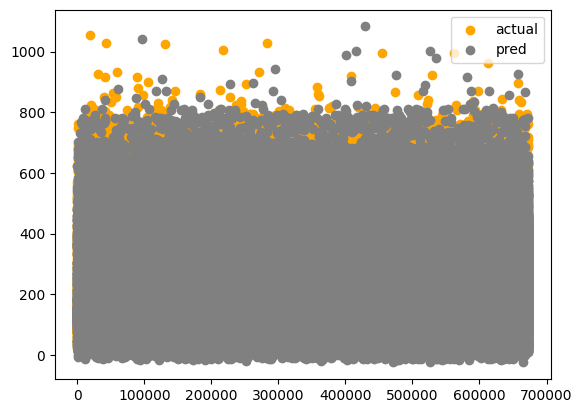

0.7962474256174439


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2)

len(xtrain),len(xtest),len(ytrain),len(ytest)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypredlog = lr.predict(xtest)

plt.scatter(range(len(ytest)),ytest,color="orange",label="actual")
plt.scatter(range(len(ypredlog)),ypredlog,color="gray",label="pred")
plt.legend()
plt.show()

from sklearn.metrics import r2_score
print(r2_score(ytest,ypredlog))

In [ ]:
trainr2 = r2_score(ytrain, lr.predict(xtrain))
testr2 = r2_score(ytest, lr.predict(xtest))
gap = abs(train_r2 - test_r2)

print(f"Train R2: {trainr2:.4f}")
print(f"Test R2: {testr2:.4f}")
print(f"Gap: {gap:.4f}")

Train R2: 0.7967
Test R2: 0.7962
Gap: 0.0004


**Lasso**

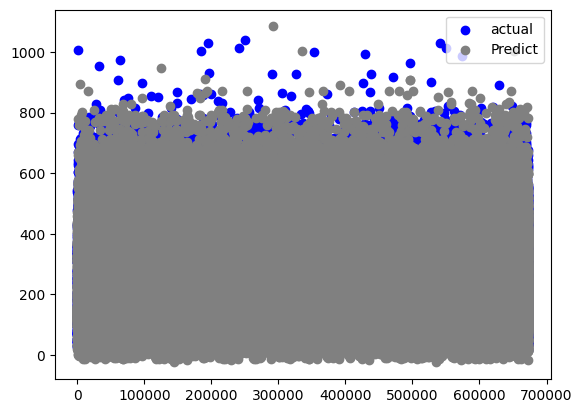

43.73
3315.5
57.58
0.7969215011014835


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2)
len(Xtrain),len(Ytrain),len(Xtest),len(Ytest)

lasso = Lasso(alpha=0.1)
lasso.fit(Xtrain,Ytrain)
Ypred = lasso.predict(Xtest)
# print(lasso.coef_)

plt.scatter(range(len(Ytest)),Ytest,color="blue",label="actual")
plt.scatter(range(len(Ypred)),Ypred,color="gray",label="Predict")
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(Ytest,Ypred)
mse = mean_squared_error(Ytest,Ypred)
rmse = np.sqrt(mse)
r2 = r2_score(Ytest,Ypred)

print(round(mae,2))
print(round(mse,2))
print(round(rmse,2))
print(r2)

In [ ]:
train_r2 = r2_score(Ytrain, lasso.predict(Xtrain))
test_r2 = r2_score(Ytest, lasso.predict(Xtest))
gap = abs(train_r2 - test_r2)

print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Gap: {gap:.4f}")

Train R2: 0.7965
Test R2: 0.7970
Gap: 0.0004


**HYPER PARAMETER LASSO**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

alphas = np.logspace(-2,2,30)
lasso_score = []

for a in alphas:
  lasso1 = Lasso(alpha=a)
  lasso.fit(Xtrain,Ytrain)
  Ypred = lasso.predict(Xtest)
  lasso_score.append(r2_score(Ytest,Ypred))

pd.DataFrame({"Alphas":alphas,"lasso":lasso_score})
print(lasso_score[np.argmax(lasso_score)])
print(alphas[np.argmax(lasso_score)])

0.7969215011014835
0.01


**RIDGE**

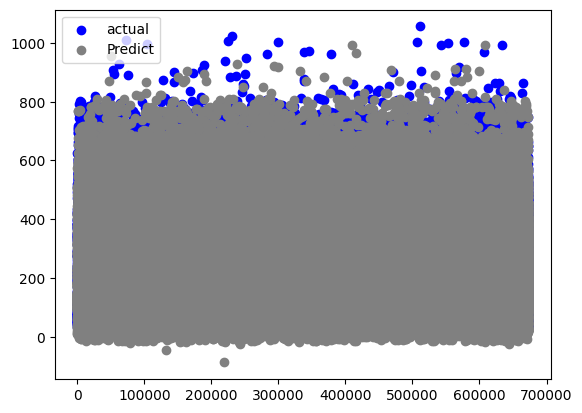

43.72
3322.47
57.64
0.7965897604897598
***************
Train R2: 0.7966
Test R2: 0.7966
Gap: 0.0000


In [ ]:
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)

ridge.fit(x1train,y1train)
ypred1=ridge.predict(x1test)
# ridge.coef_

plt.scatter(range(len(y1test)),y1test,color="blue",label="actual")
plt.scatter(range(len(ypred1)),ypred1,color="gray",label="Predict")
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y1test,ypred1)
mse = mean_squared_error(y1test,ypred1)
rmse = np.sqrt(mse)
r2 = r2_score(y1test,ypred1)

print(round(mae,2))
print(round(mse,2))
print(round(rmse,2))
print(r2)
print("*"*15)

Train_r2 = r2_score(y1train, ridge.predict(x1train))
Test_r2 = r2_score(y1test, ridge.predict(x1test))
gap = abs(Train_r2 - Test_r2)

print(f"Train R2: {Train_r2:.4f}")
print(f"Test R2: {Test_r2:.4f}")
print(f"Gap: {gap:.4f}")

**HYPER PARAMETER RIDGE**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

alphas = np.logspace(-2,2,30)
ridge_score = []

for a in alphas:
  Ridge1 = Ridge(alpha=a)
  ridge.fit(x1train,y1train)
  ypred1=ridge.predict(x1test)
  ridge_score.append(r2_score(y1test,ypred1))

pd.DataFrame({"Alphas":alphas,"lasso":ridge_score})
print(ridge_score[np.argmax(ridge_score)])
print(alphas[np.argmax(ridge_score)])

0.7978137462128563
0.01
